<a href="https://colab.research.google.com/github/ozerzeynep/BreastCancerPredictor/blob/main/Heart_Disease_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dfC = pd.read_csv("heart_disease_uci.csv", encoding="ISO-8859-9",delimiter=";")

In [ ]:
df = dfC.copy()

In [ ]:
df.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.Mar,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.May,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.Haz,flat,2.0,reversable defect,1


In [ ]:
df.tail(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0,NaN,NaN,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    object 
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 115.1+ KB


In [ ]:
df.shape

(920, 16)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.axes

[RangeIndex(start=0, stop=920, step=1),
 Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
        'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
       dtype='object')]

In [ ]:
df = df.drop(columns= ["id"])

In [ ]:
df.head(3)

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.Mar,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.May,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.Haz,flat,2.0,reversable defect,1


In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
numerical_features

['age', 'trestbps', 'chol', 'thalch', 'ca', 'num']

<Figure size 1500x500 with 0 Axes>

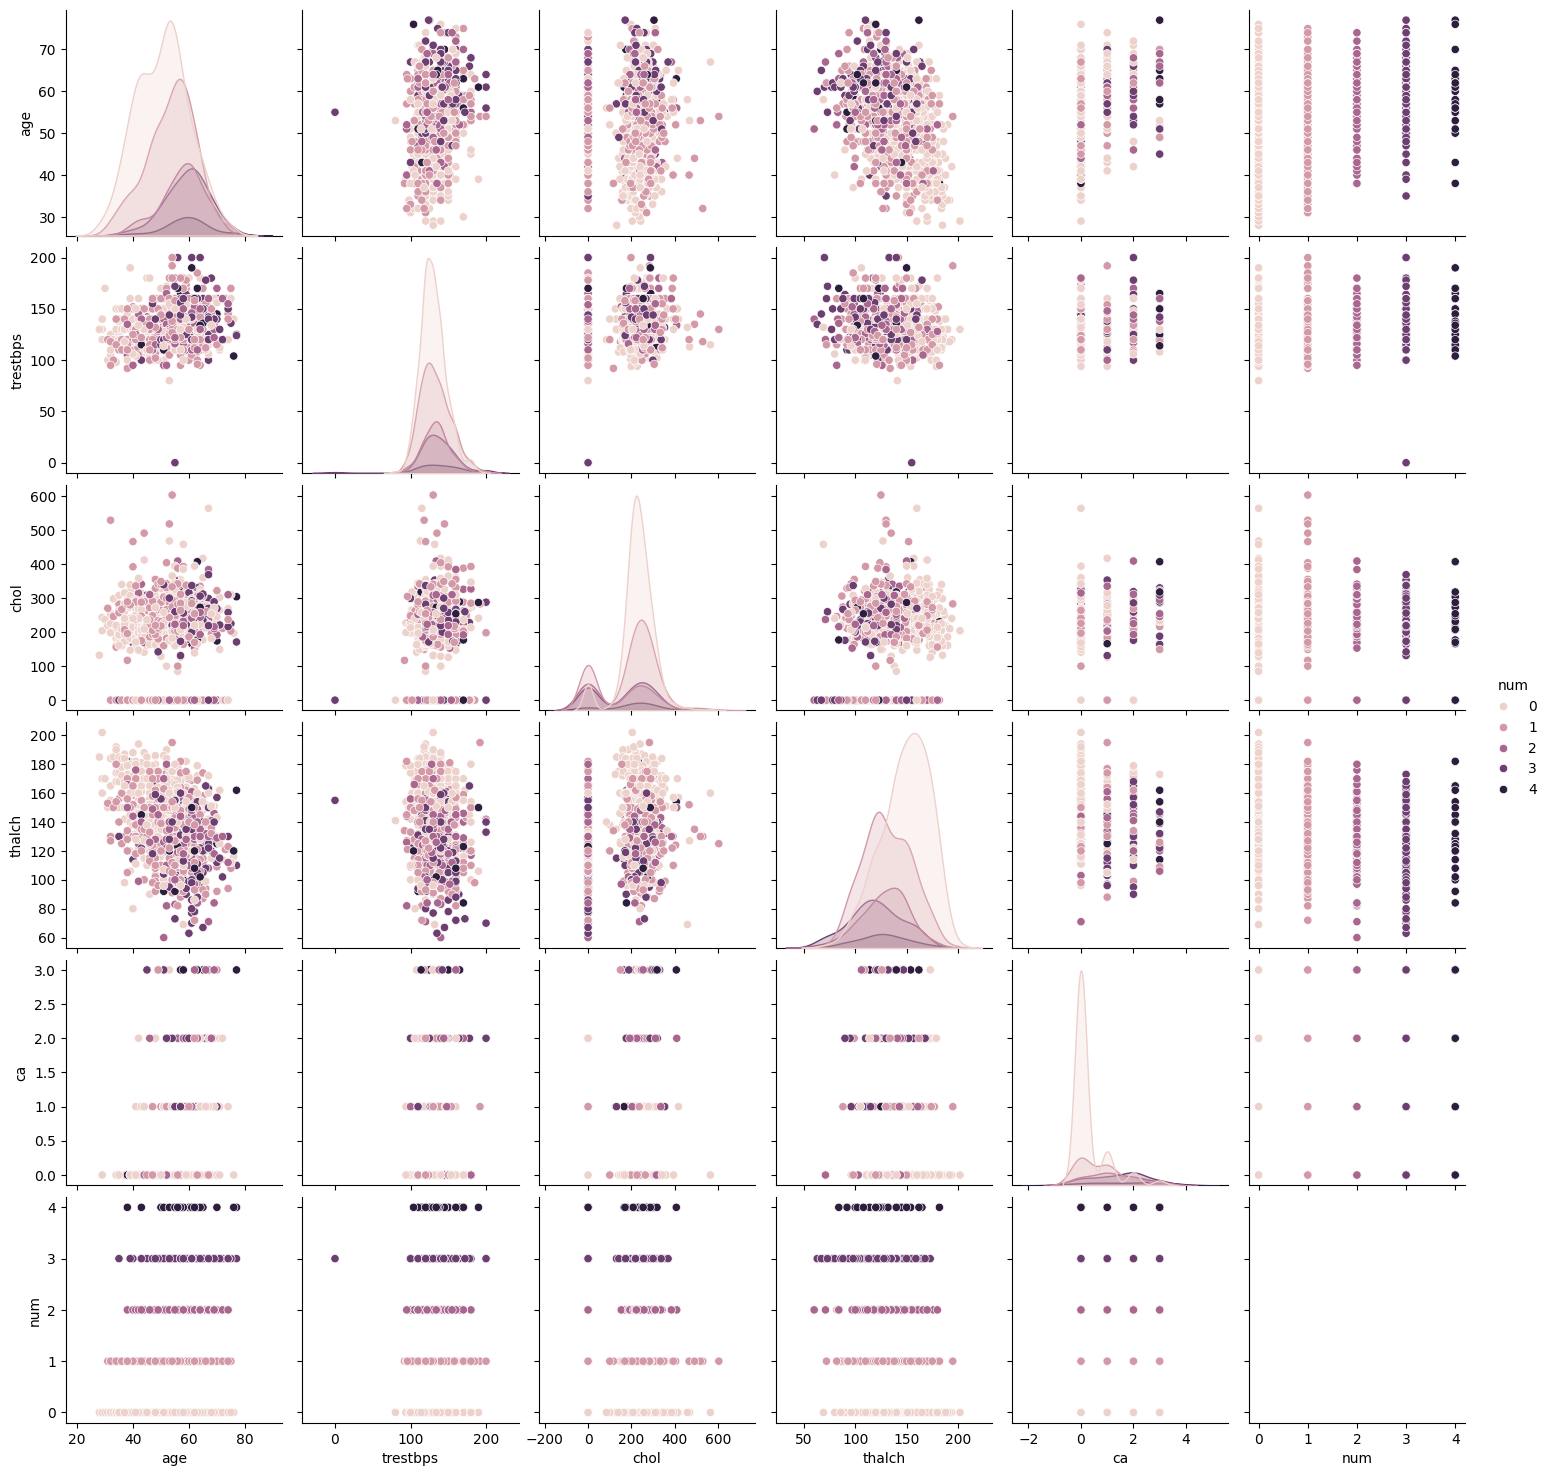

In [ ]:
plt.figure(figsize=(15,5))
sns.pairplot(df, vars= numerical_features, hue= "num")
plt.show()

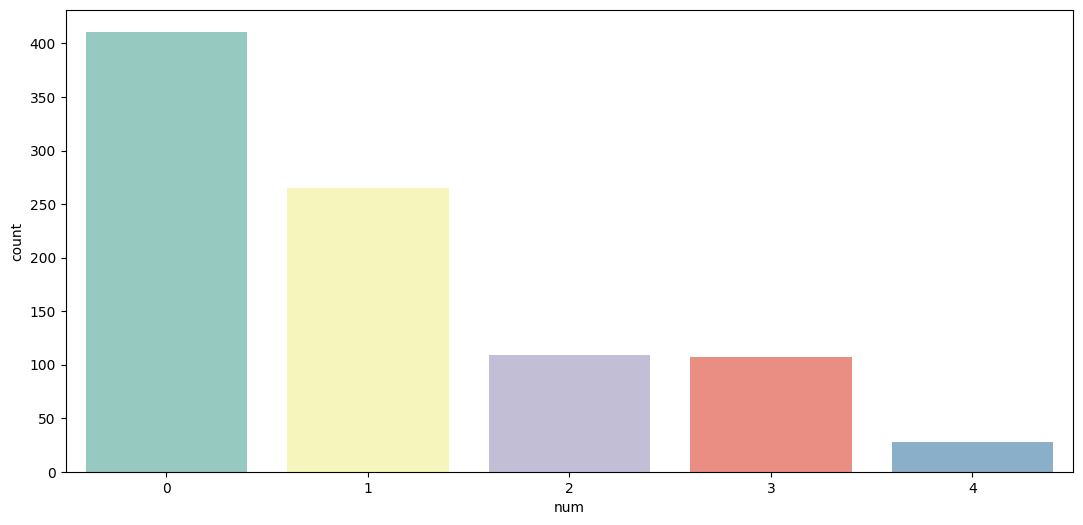

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(x="num", data = df, palette="Set3")
plt.show()

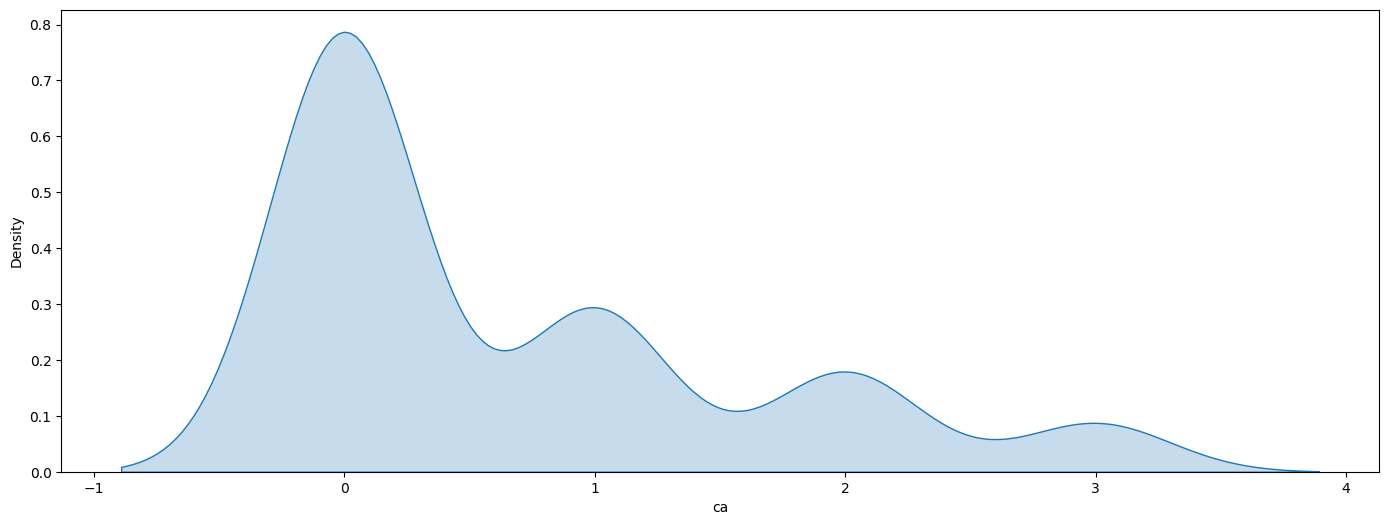

In [ ]:
plt.figure(figsize=(17,6))
sns.kdeplot(df.ca, shade=True)
plt.show()

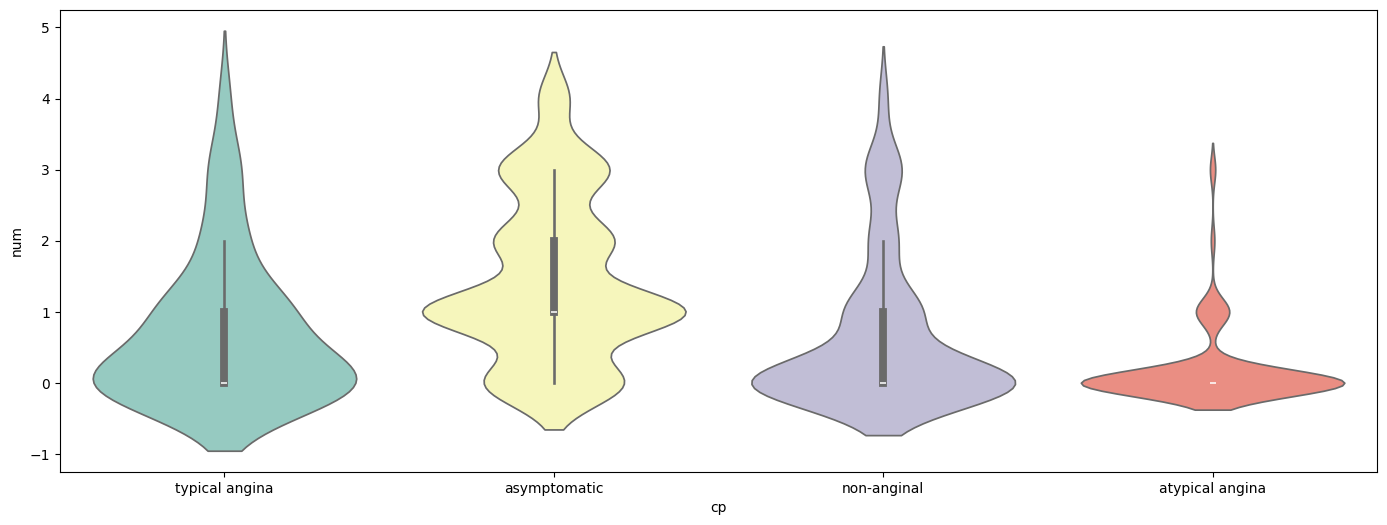

In [ ]:
plt.figure(figsize=(17,6))
sns.violinplot(x= "cp", y= "num", data= df, palette="Set3")
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=[float, int])

In [ ]:
corr = numeric_df.corr()

In [ ]:
print(corr)

               age  trestbps      chol    thalch        ca       num
age       1.000000  0.244253 -0.086234 -0.365778  0.370416  0.339596
trestbps  0.244253  1.000000  0.092853 -0.104899  0.093705  0.122291
chol     -0.086234  0.092853  1.000000  0.236121  0.051606 -0.231547
thalch   -0.365778 -0.104899  0.236121  1.000000 -0.264094 -0.366265
ca        0.370416  0.093705  0.051606 -0.264094  1.000000  0.516216
num       0.339596  0.122291 -0.231547 -0.366265  0.516216  1.000000


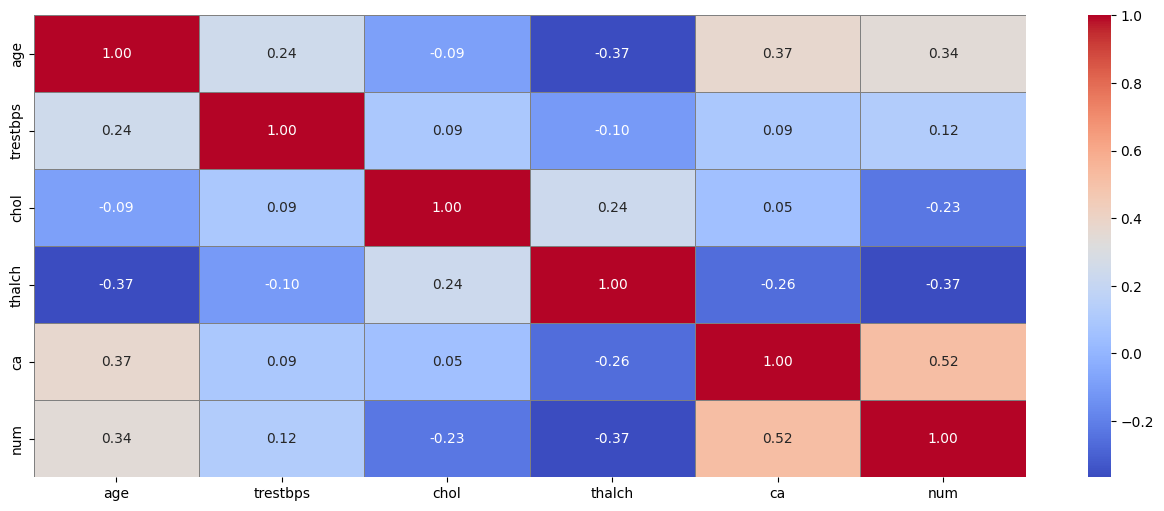

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.6, linecolor='gray')
plt.show()

Mean: 53.51086956521739
Median: 54.0
Mode: 54


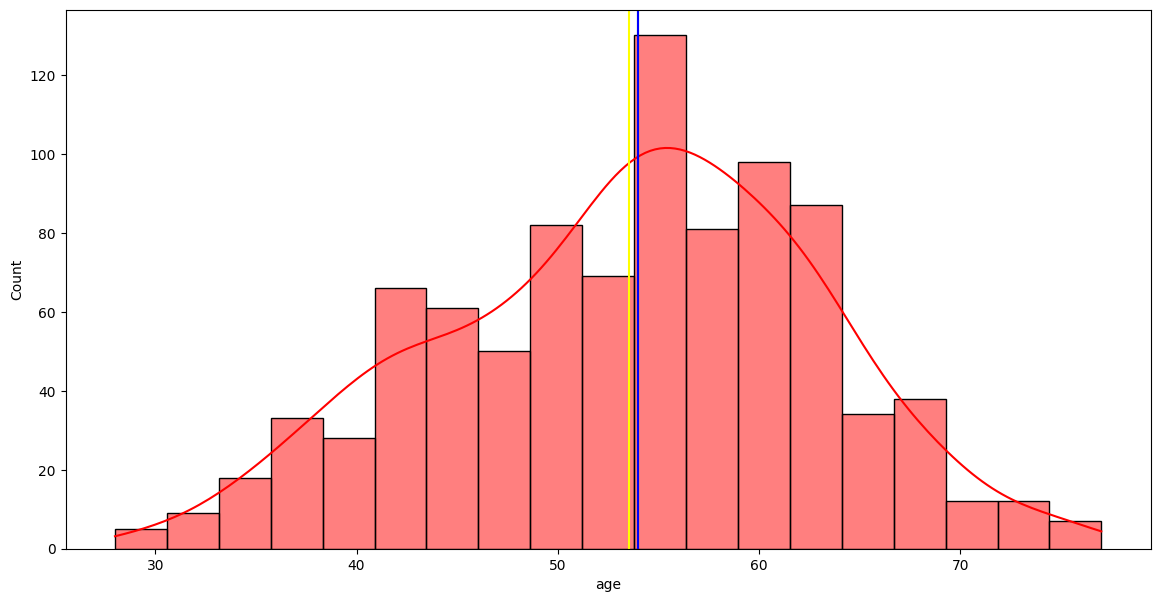

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(df['age'], kde=True, color="red")

plt.axvline(df['age'].mean(), color='yellow')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [ ]:
plt.figure(figsize=(16,5))
fig=px.bar(df, x='dataset', color='sex')
fig.show()
print(df.groupby('dataset')['sex'].value_counts())

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64


<Figure size 1600x500 with 0 Axes>

In [ ]:
fig=px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

In [ ]:
fig = px.histogram(df, x='cp', color='dataset', barmode='group')
fig.show()

In [ ]:
fig=px.histogram(data_frame=df, x='age', color='cp')
fig.show()

In [ ]:
fig = px.histogram(df, x='cp', color='sex', barmode='group')
fig.show()

In [ ]:
fig = px.histogram(df, x='fbs', color='sex', barmode='group')
fig.show()

In [ ]:
df = df.drop(columns= ["ca"])
df["trestbps"].fillna(df["trestbps"].median(), inplace=True)

In [ ]:
df["chol"].fillna(df["chol"].median(), inplace=True)

In [ ]:
df["fbs"].fillna(df["fbs"].mode()[0], inplace=True)

In [ ]:
df["restecg"].fillna(df["restecg"].mode()[0], inplace=True)

In [ ]:
df["thalch"].fillna(df["thalch"].median(), inplace= True)

In [ ]:
df["exang"].fillna(df["exang"].mode()[0], inplace=True)

In [ ]:
df["oldpeak"].fillna(df["oldpeak"].mode()[0], inplace= True)

In [ ]:
df["slope"].fillna(df["slope"].mode()[0], inplace=True)
df["thal"].fillna(df["thal"].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0


In [ ]:
df.shape

(920, 14)